In [ ]:
from google.colab import files
uploaded = files.upload()


Saving Reviews.csv to Reviews.csv


In [ ]:
import pandas as pd

df = pd.read_csv('Reviews.csv')
df.head()


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [ ]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

# Function to clean the text data
def clean_text(text):
    text = re.sub('<.*?>', '', text)  # Remove HTML tags
    text = re.sub('[^a-zA-Z]', ' ', text)  # Remove punctuations and numbers
    text = text.lower()  # Convert to lowercase
    text = text.split()  # Tokenize
    text = [word for word in text if not word in stopwords.words('english')]  # Remove stop words
    text = ' '.join(text)  # Join the words back into a single string
    return text

# Apply the cleaning function to the Text column
df['Cleaned_Text'] = df['Text'].apply(clean_text)
df.head()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Cleaned_Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,bought several vitality canned dog food produc...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,product arrived labeled jumbo salted peanuts p...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,confection around centuries light pillowy citr...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,looking secret ingredient robitussin believe f...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,great taffy great price wide assortment yummy ...


In [ ]:
# Download the VADER lexicon
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Initialize the VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Function to get the sentiment score
def get_sentiment(text):
    score = sid.polarity_scores(text)
    return score['compound']

# Apply the sentiment analysis function to the Cleaned_Text column
df['Sentiment_Score'] = df['Cleaned_Text'].apply(get_sentiment)
df.head()


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Cleaned_Text,Sentiment_Score
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,bought several vitality canned dog food produc...,0.9413
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,product arrived labeled jumbo salted peanuts p...,-0.1027
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,confection around centuries light pillowy citr...,0.8073
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,looking secret ingredient robitussin believe f...,0.4404
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,great taffy great price wide assortment yummy ...,0.9468


In [ ]:
# Function to classify the sentiment score
def classify_sentiment(score):
    if score > 0.05:
        return 'Positive'
    elif score < -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Apply the classification function to the Sentiment_Score column
df['Sentiment'] = df['Sentiment_Score'].apply(classify_sentiment)
df.head()


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Cleaned_Text,Sentiment_Score,Sentiment
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,bought several vitality canned dog food produc...,0.9413,Positive
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,product arrived labeled jumbo salted peanuts p...,-0.1027,Negative
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,confection around centuries light pillowy citr...,0.8073,Positive
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,looking secret ingredient robitussin believe f...,0.4404,Positive
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,great taffy great price wide assortment yummy ...,0.9468,Positive


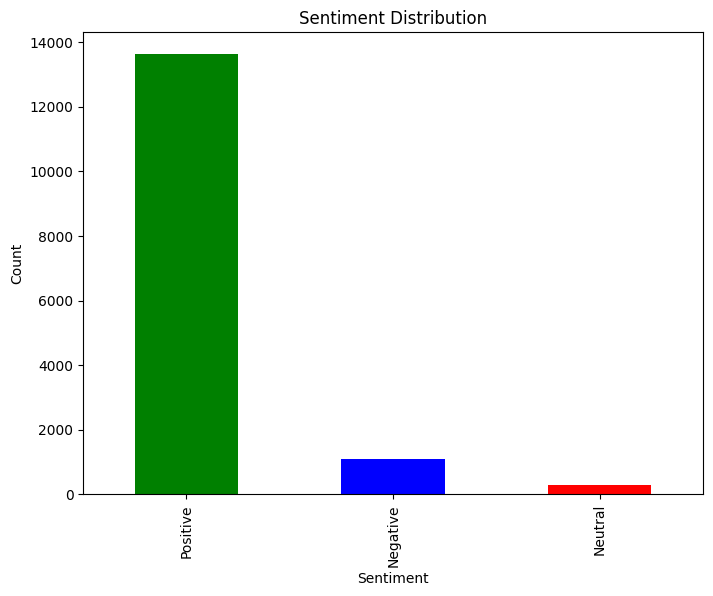

In [ ]:
import matplotlib.pyplot as plt

# Plot the distribution of sentiments
plt.figure(figsize=(8,6))
df['Sentiment'].value_counts().plot(kind='bar', color=['green', 'blue', 'red'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


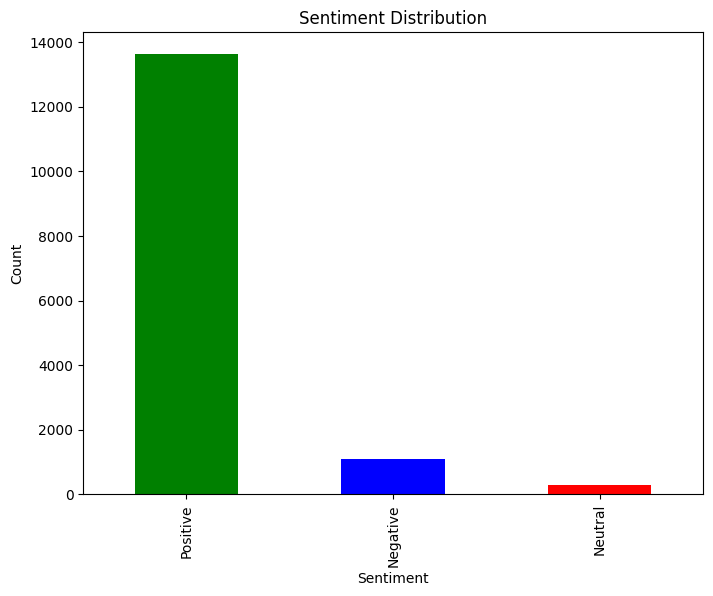

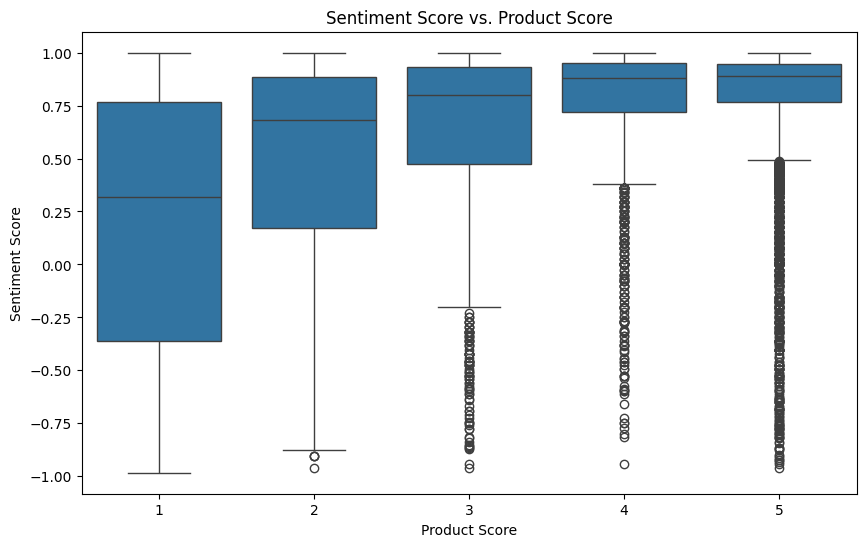

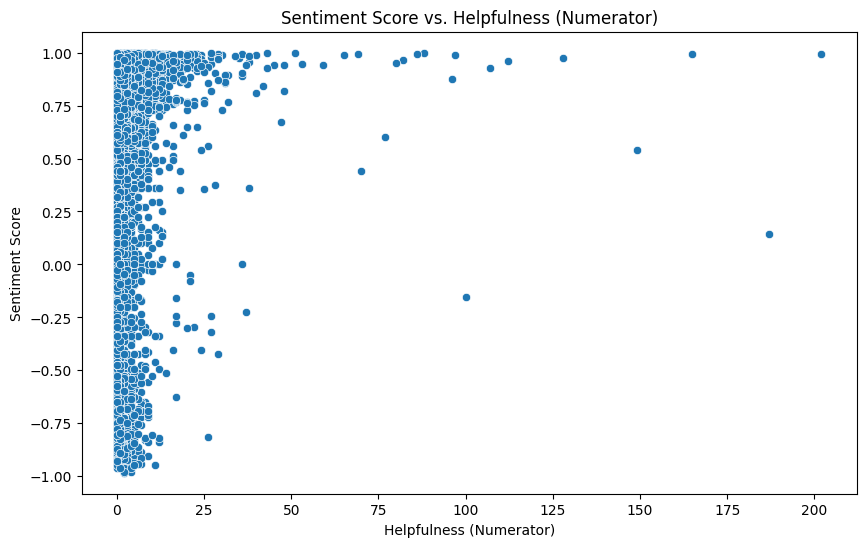

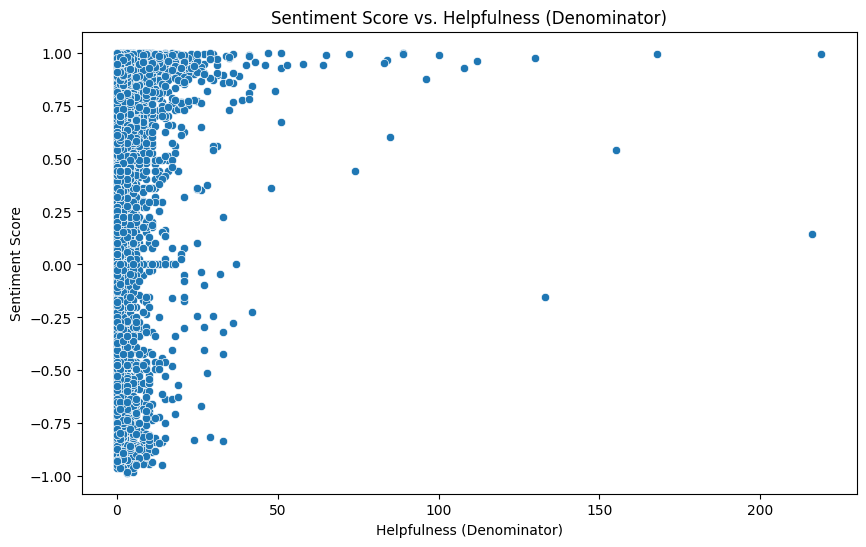

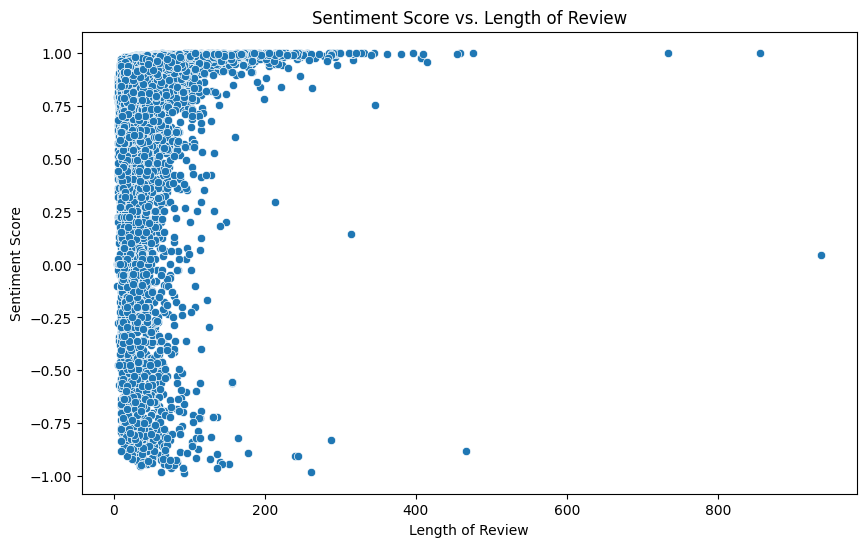

In [ ]:
def clean_text(text):
    text = re.sub('<.*?>', '', text)  # Remove HTML tags
    text = re.sub('[^a-zA-Z]', ' ', text)  # Remove punctuations and numbers
    text = text.lower()  # Convert to lowercase
    text = text.split()  # Tokenize
    text = [word for word in text if not word in stopwords.words('english')]  # Remove stop words
    text = ' '.join(text)  # Join the words back into a single string
    return text

# Apply the cleaning function to the Text column
df['Cleaned_Text'] = df['Text'].apply(clean_text)
df.head()

# Download the VADER lexicon
nltk.download('vader_lexicon')

# Sentiment Analysis
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Initialize the VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Function to get the sentiment score
def get_sentiment(text):
    score = sid.polarity_scores(text)
    return score['compound']

# Apply the sentiment analysis function to the Cleaned_Text column
df['Sentiment_Score'] = df['Cleaned_Text'].apply(get_sentiment)
df.head()

# Classifying the Sentiments
# Function to classify the sentiment score
def classify_sentiment(score):
    if score > 0.05:
        return 'Positive'
    elif score < -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Apply the classification function to the Sentiment_Score column
df['Sentiment'] = df['Sentiment_Score'].apply(classify_sentiment)
df.head()

# Visualizing the Results
import matplotlib.pyplot as plt

# Plot the distribution of sentiments
plt.figure(figsize=(8,6))
df['Sentiment'].value_counts().plot(kind='bar', color=['green', 'blue', 'red'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

# Comparison of Sentiment with Various Factors
import seaborn as sns

# Sentiment vs. Product Score
plt.figure(figsize=(10,6))
sns.boxplot(x='Score', y='Sentiment_Score', data=df)
plt.title('Sentiment Score vs. Product Score')
plt.xlabel('Product Score')
plt.ylabel('Sentiment Score')
plt.show()

# Sentiment vs. Helpfulness (Numerator)
plt.figure(figsize=(10,6))
sns.scatterplot(x='HelpfulnessNumerator', y='Sentiment_Score', data=df)
plt.title('Sentiment Score vs. Helpfulness (Numerator)')
plt.xlabel('Helpfulness (Numerator)')
plt.ylabel('Sentiment Score')
plt.show()

# Sentiment vs. Helpfulness (Denominator)
plt.figure(figsize=(10,6))
sns.scatterplot(x='HelpfulnessDenominator', y='Sentiment_Score', data=df)
plt.title('Sentiment Score vs. Helpfulness (Denominator)')
plt.xlabel('Helpfulness (Denominator)')
plt.ylabel('Sentiment Score')
plt.show()

# Sentiment vs. Length of Review
df['Review_Length'] = df['Cleaned_Text'].apply(lambda x: len(x.split()))
plt.figure(figsize=(10,6))
sns.scatterplot(x='Review_Length', y='Sentiment_Score', data=df)
plt.title('Sentiment Score vs. Length of Review')
plt.xlabel('Length of Review')
plt.ylabel('Sentiment Score')
plt.show()